In [1]:
import pandas as pd
import nfl_data_py as nfl
from datetime import date
from team_functions import map_team_abbreviations

In [2]:
# update game list
# !python download_games.py
df = nfl.import_schedules(years=range(1999, 2026))
df = map_team_abbreviations(df)
completed_games = df[df['result'].notna()]
upcoming_games = df[df['result'].isna()]

In [3]:
elo_prep = completed_games[['game_id','season','game_type','gameday', 'week','away_team','home_team','away_score','home_score']]




In [4]:
from elo_functions import calculate_elo_history, create_team_elo_chart

# 1. CALCULATE ELO HISTORY
elo_prep = calculate_elo_history(elo_prep)

# 2. CREATE THE CHART
team_elo_chart = create_team_elo_chart(elo_prep)
team_elo_chart

team                 ARI          ATL          BAL          BUF          CAR  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1515.000000  1485.000000  1485.000000  1485.000000  1485.000000   
       3     1500.000000  1471.291995  1471.291995  1500.000000  1471.291995   
       4     1485.055780  1458.169129  1486.291995  1513.708005  1486.264157   
       5     1471.930543  1444.380646  1500.080478  1529.410872  1486.264157   
...                  ...          ...          ...          ...          ...   
2025   8     1391.875324  1442.975730  1585.674176  1668.406543  1364.485616   
       9     1384.673200  1426.966865  1594.200933  1672.849816  1360.042344   
       10    1404.083686  1412.443367  1602.791993  1690.638183  1384.356947   
       11    1396.395590  1401.523792  1616.783635  1666.032293  1367.672538   
       12    1396.395590  1401.523792  1616.783635  1676.426571  1367.672538   

team                 CHI          CIN          CLE          DAL          DEN  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1515.000000  1485.000000  1485.000000  1515.000000  1485.000000   
       3     1498.708005  1470.647200  1471.291995  1515.000000  1470.000000   
       4     1483.819563  1455.675038  1456.291995  1528.708005  1456.291995   
       5     1499.461956  1443.758303  1444.986131  1541.833242  1441.294384   
...                  ...          ...          ...          ...          ...   
2025   8     1425.228690  1551.867652  1407.779776  1503.469693  1537.573094   
       9     1416.701932  1528.025537  1407.779776  1489.937345  1551.105443   
       10    1436.350165  1528.025537  1393.466373  1489.937345  1563.894294   
       11    1447.468139  1508.377304  1376.199059  1470.526859  1570.878524   
       12    1447.468139  1508.377304  1376.199059  1470.526859  1570.878524   

team         ...           NO          NYG          NYJ          PHI  \
season week  ...                                                       
1999   1     ...  1500.000000  1500.000000  1500.000000  1500.000000   
       2     ...  1515.000000  1515.000000  1485.000000  1485.000000   
       3     ...  1515.000000  1498.708005  1470.000000  1470.000000   
       4     ...  1498.708005  1485.055348  1456.347343  1456.291995   
       5     ...  1483.065613  1498.816364  1471.344953  1442.530979   
...          ...          ...          ...          ...          ...   
2025   8     ...  1357.713800  1355.346200  1316.702358  1712.947073   
       9     ...  1350.857599  1351.950359  1316.702358  1712.947073   
       10    ...  1345.176799  1344.340981  1340.544473  1716.342914   
       11    ...  1345.176799  1333.223007  1357.811787  1726.047339   
       12    ...  1345.176799  1333.223007  1357.811787  1726.047339   

team                 PIT          SEA           SF           TB          TEN  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1515.000000  1485.000000  1485.000000  1485.000000  1515.000000   
       3     1528.708005  1501.291995  1501.291995  1500.000000  1528.708005   
       4     1512.526812  1517.473188  1516.236215  1513.708005  1543.708005   
       5     1497.577808  1517.473188  1532.419802  1497.418401  1527.524418   
...                  ...          ...          ...          ...          ...   
2025   8     1558.153826  1565.717362  1557.684165  1569.054225  1292.066746   
       9     1544.919903  1577.630402  1539.437167  1569.054225  1285.616212   
       10    1558.995073  1589.170826  1547.046545  1575.910427  1285.616212   
       11    1542.731357  1596.858922  1534.699751  1555.796874  1279.536660   
       12    1542.731

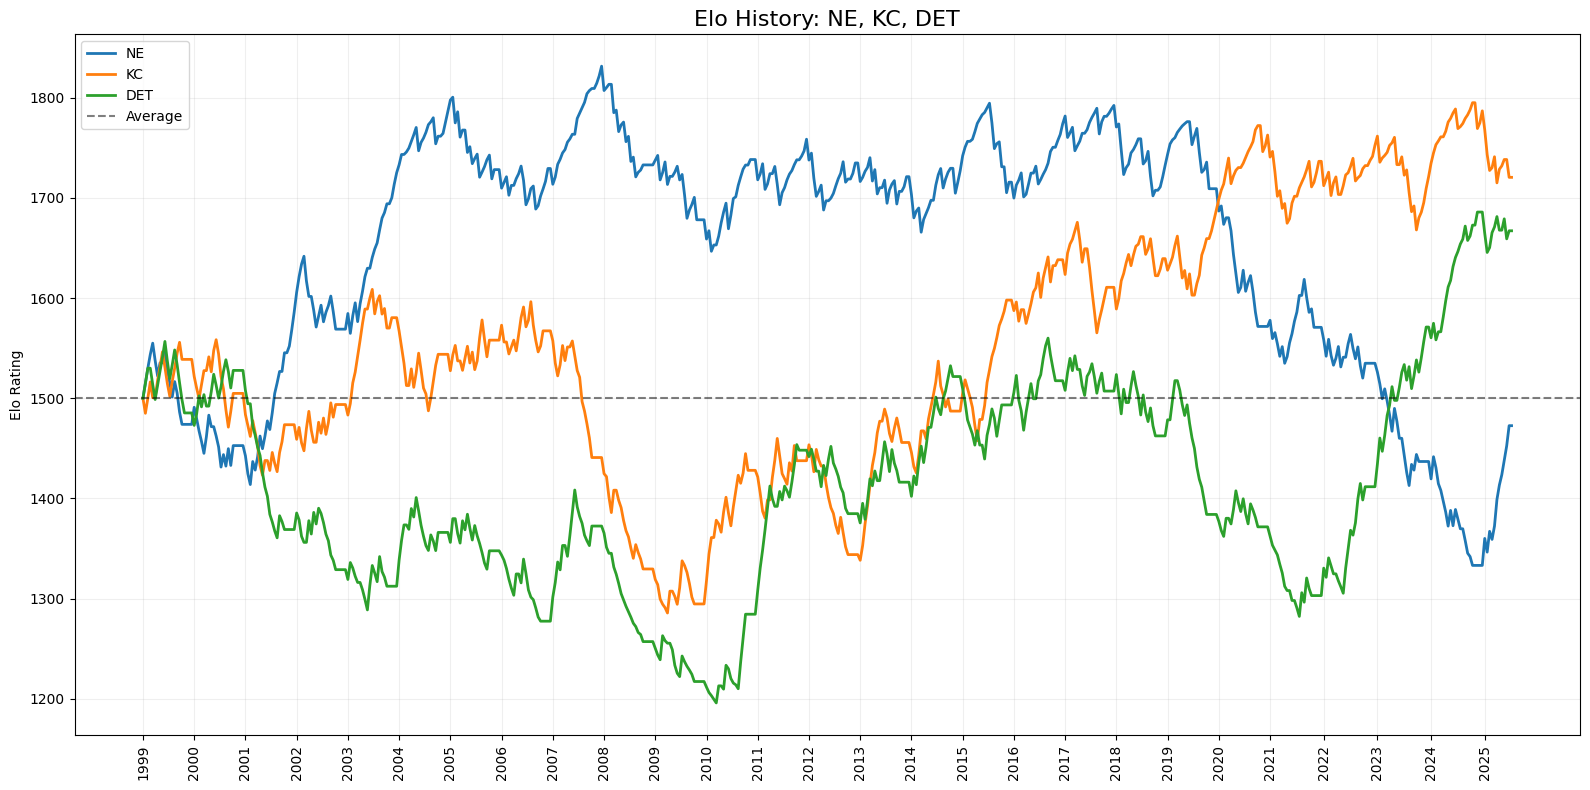

In [5]:
from plotting_functions import plot_elo_every_season

plot_elo_every_season(['NE', 'KC', 'DET'], team_elo_chart)